In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 # figure dots per inch
%matplotlib inline

import seaborn as sns
sns.set(palette='Set1')

from datetime import datetime, timedelta

# Transactions dataset

In [3]:
transactions_df = pd.read_pickle('Data/transactions_clean.pickle')
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31
10,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21
24,qNpZJ7gsMPAFSvc5V3kgqtFfUQU2SZe7XSUYOAfqtoA=,40,30,149,149,1,20151001,20151101,0,2015-10-01,2015-11-01
26,WnxdSgeK3Vg4BIaioJQYilnL+E1SDxq+PZIwmmfTwgM=,34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31
27,ir1jh/vWZ932FpSC2WeMxdOHQ+OkuUo3ZPQs8Ms4J9g=,34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31


In [4]:
transactions_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13664286 entries, 1 to 22974713
Data columns (total 11 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   msno                       object        
 1   payment_method_id          int16         
 2   payment_plan_days          int16         
 3   plan_list_price            int16         
 4   actual_amount_paid         int16         
 5   is_auto_renew              int16         
 6   transaction_date           int64         
 7   membership_expire_date     int64         
 8   is_cancel                  int16         
 9   transaction_date_dt        datetime64[ns]
 10  membership_expire_date_dt  datetime64[ns]
dtypes: datetime64[ns](2), int16(6), int64(2), object(1)
memory usage: 781.9+ MB


In [5]:
transactions_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07
mean,3.926181e+01,2.992232e+01,1.317261e+02,1.362609e+02,9.047002e-01,2.015808e+07,2.015916e+07,1.788714e-02
std,3.263967e+00,1.756192e+01,7.888522e+01,7.586549e+01,2.936286e-01,5.617590e+03,6.083125e+03,1.325413e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.015010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015103e+07,2.015121e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016050e+07,2.016061e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016093e+07,2.016103e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017030e+07,2.017023e+07,1.000000e+00


### Categorical features

In [6]:
transactions_by_payment_method = transactions_df.groupby('payment_method_id')['msno'].count()
transactions_by_payment_method.head()

payment_method_id
2    14
3    58
4     4
5    82
6    69
Name: msno, dtype: int64

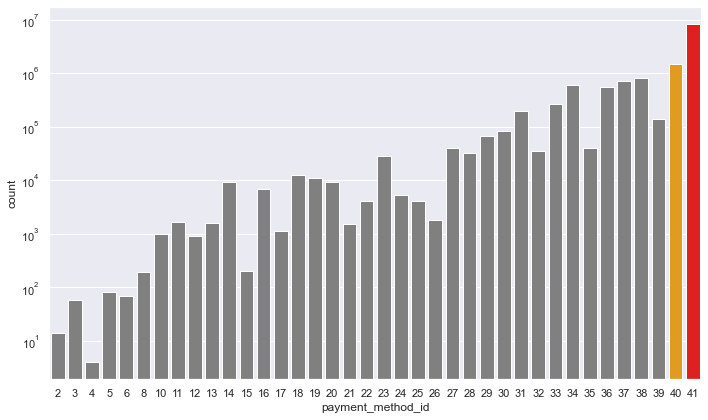

In [7]:
clrs = ['red' if (x == transactions_by_payment_method.max()) else 'orange' if 
        (x > transactions_by_payment_method.max()/10)
        else 'gray' for x in transactions_by_payment_method]
plt.figure(figsize=(10,6)) 
pay_mtd = sns.countplot(transactions_df['payment_method_id'], palette=clrs)
pay_mtd.set_yscale("log")
plt.tight_layout()

In [8]:
# payment plan days (duration)

In [9]:
transactions_by_payment_plan_days = transactions_df.groupby('payment_plan_days')['msno'].count()
transactions_by_payment_plan_days.head()

payment_plan_days
0    516619
1      1843
2         5
3        11
7     46451
Name: msno, dtype: int64

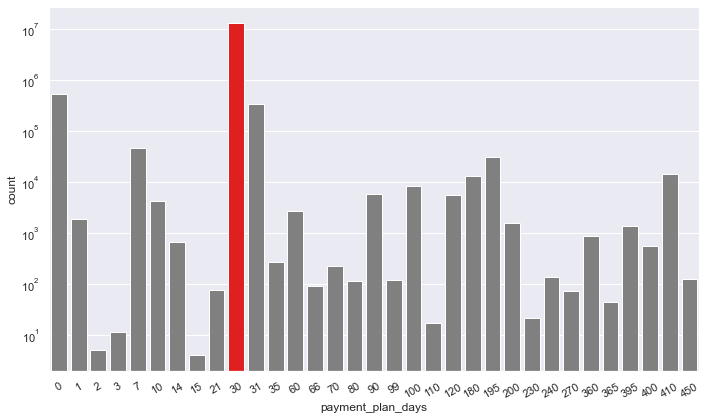

In [10]:
clrs = ['red' if (x == transactions_by_payment_plan_days.max()) else 'orange' if 
        (x > transactions_by_payment_plan_days.max()/10)
        else 'gray' for x in transactions_by_payment_plan_days]
plt.figure(figsize=(10,6)) 
pay_plan = sns.countplot(transactions_df['payment_plan_days'], palette=clrs)
pay_plan.set_yscale("log")
pay_plan.set_xticklabels(pay_plan.get_xticklabels(), rotation=30)
plt.tight_layout()

In [11]:
# is_cancel

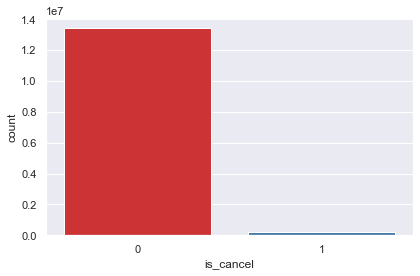

In [12]:
sns.countplot(data=transactions_df, x='is_cancel')
plt.tight_layout()

In [13]:
# is_auto_renew

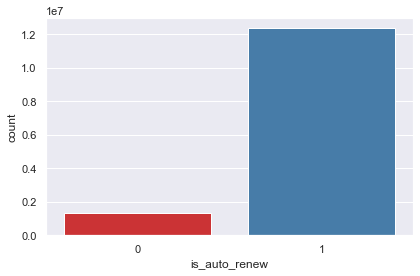

In [14]:
sns.countplot(data=transactions_df, x='is_auto_renew')
plt.tight_layout()

### Numerical features

In [15]:
# plan list price

In [16]:
transactions_by_plan_list_price = transactions_df.groupby('plan_list_price')['msno'].count()
transactions_by_plan_list_price.head()

plan_list_price
0     569291
1         18
10         5
15         9
35      1719
Name: msno, dtype: int64

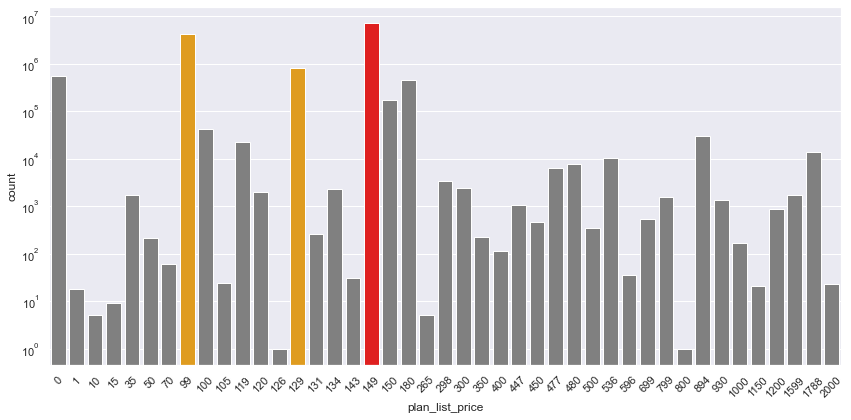

In [17]:
clrs = ['red' if (x == transactions_by_plan_list_price.max()) else 'orange' if 
        (x > transactions_by_plan_list_price.max()/10)
        else 'gray' for x in transactions_by_plan_list_price]
plt.figure(figsize=(12,6)) 
plan_price = sns.countplot(transactions_df['plan_list_price'], palette=clrs)
plan_price.set_yscale("log")
plan_price.set_xticklabels(plan_price.get_xticklabels(), rotation=45)
plt.tight_layout()

In [18]:
# actual payment

In [19]:
transactions_by_amount_paid = transactions_df.groupby('actual_amount_paid')['msno'].count()
transactions_by_amount_paid.head()

actual_amount_paid
0     114644
1         18
10         5
15         9
35      1850
Name: msno, dtype: int64

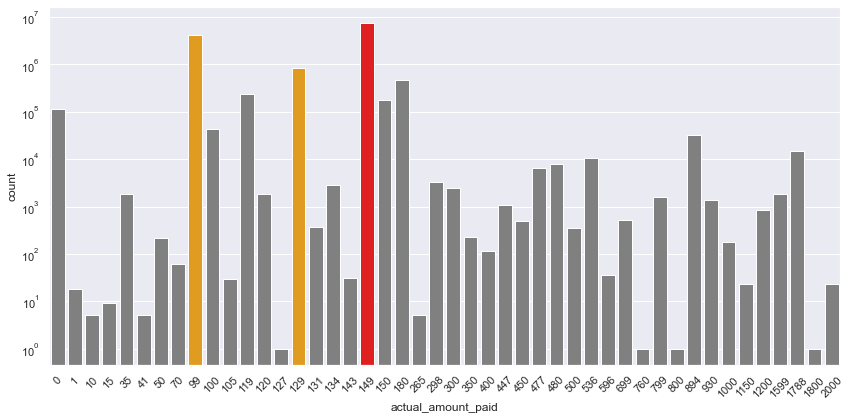

In [20]:
clrs = ['red' if (x == transactions_by_amount_paid.max()) else 'orange' if 
        (x > transactions_by_amount_paid.max()/10)
        else 'gray' for x in transactions_by_amount_paid]
plt.figure(figsize=(12,6)) 
amount_paid = sns.countplot(transactions_df['actual_amount_paid'], palette=clrs)
amount_paid.set_yscale("log")
amount_paid.set_xticklabels(amount_paid.get_xticklabels(), rotation=45)
plt.tight_layout()

In [21]:
# plan price and amount paid difference

In [22]:
transactions_df['credit'] = (transactions_df['actual_amount_paid'] - transactions_df['plan_list_price'])
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,credit
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31,0
10,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21,0
24,qNpZJ7gsMPAFSvc5V3kgqtFfUQU2SZe7XSUYOAfqtoA=,40,30,149,149,1,20151001,20151101,0,2015-10-01,2015-11-01,0
26,WnxdSgeK3Vg4BIaioJQYilnL+E1SDxq+PZIwmmfTwgM=,34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,149
27,ir1jh/vWZ932FpSC2WeMxdOHQ+OkuUo3ZPQs8Ms4J9g=,34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,149


In [23]:
transactions_df['credit'].value_counts(normalize=True)

 0       9.428292e-01
 149     3.462179e-02
-30      1.483971e-02
-149     4.256278e-03
 119     1.288834e-03
 129     1.269587e-03
 150     3.020282e-04
-180     1.465133e-04
-20      1.433664e-04
-50      8.452692e-05
 894     5.430214e-05
 134     4.559331e-05
 100     3.432305e-05
 1788    2.971249e-05
-120     1.105071e-05
 35      9.587036e-06
 131     8.342917e-06
 536     4.610559e-06
 480     3.512807e-06
 300     3.439624e-06
 799     3.293257e-06
 1599    2.927339e-06
 30      1.975954e-06
 450     9.513852e-07
 447     7.318348e-07
 930     6.586513e-07
 1000    6.586513e-07
 350     4.391009e-07
 500     3.659174e-07
 105     3.659174e-07
-108     2.927339e-07
-1       2.927339e-07
 400     1.463670e-07
 1150    1.463670e-07
 760     7.318348e-08
 50      7.318348e-08
 41      7.318348e-08
-699     7.318348e-08
 12      7.318348e-08
 1       7.318348e-08
Name: credit, dtype: float64

In [24]:
transactions_credit = transactions_df.groupby('credit')['msno'].count()
transactions_credit.head()

credit
-699        1
-180     2002
-149    58159
-120      151
-108        4
Name: msno, dtype: int64

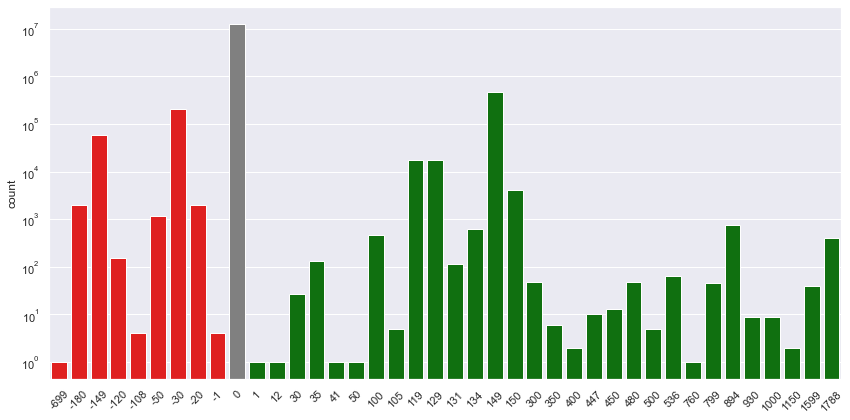

In [25]:
clrs = ['red' if (x < 0) else 'gray' if 
        (x == 0) else 'green' for x in 
        transactions_credit.index]
plt.figure(figsize=(12, 6)) 
amount_paid = sns.countplot((transactions_df['actual_amount_paid'] - 
                             transactions_df['plan_list_price']),
                             palette=clrs)
amount_paid.set_yscale("log")
amount_paid.set_xticklabels(amount_paid.get_xticklabels(), rotation=45)
plt.tight_layout()

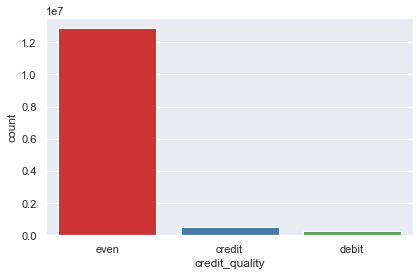

In [26]:
transactions_df['credit_quality'] = np.where(transactions_df['credit'] == 0, 
                                             'even', 
                                             np.where(transactions_df['credit'] > 0, 
                                                     'credit', 'debit'))

sns.countplot(x='credit_quality', data=transactions_df)
plt.tight_layout()

In [27]:
# transaction_date, membership_expire_date

In [28]:
transactions_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,credit
count,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07,1.366429e+07
mean,3.926181e+01,2.992232e+01,1.317261e+02,1.362609e+02,9.047002e-01,2.015808e+07,2.015916e+07,1.788714e-02,4.534741e+00
std,3.263967e+00,1.756192e+01,7.888522e+01,7.586549e+01,2.936286e-01,5.617590e+03,6.083125e+03,1.325413e-01,3.257340e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.015010e+07,0.000000e+00,-6.990000e+02
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015103e+07,2.015121e+07,0.000000e+00,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016050e+07,2.016061e+07,0.000000e+00,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016093e+07,2.016103e+07,0.000000e+00,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017030e+07,2.017023e+07,1.000000e+00,1.788000e+03


In [29]:
trans_count_by_date = transactions_df.groupby('transaction_date_dt')['msno'].count()
trans_count_by_exp = transactions_df.groupby('membership_expire_date_dt')['msno'].count()

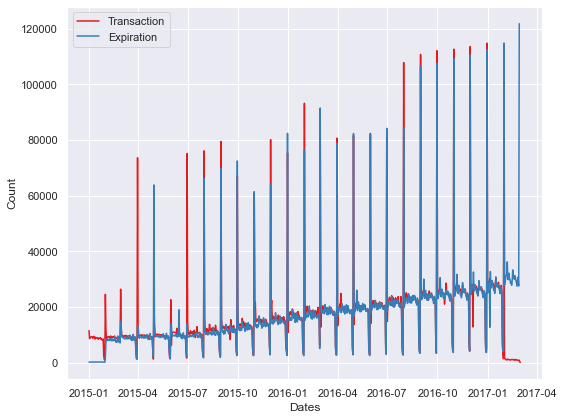

In [30]:
plt.figure(figsize=(8, 6)) 
ax = sns.lineplot(trans_count_by_date.index, trans_count_by_date, label='Transaction')
ax = sns.lineplot(trans_count_by_exp.index, trans_count_by_exp, label='Expiration')
ax.set_xlabel('Dates')
ax.set_ylabel('Count')
plt.tight_layout()

## Sample of User logs dataset

In [31]:
user_logs_v1_df = pd.read_csv('user_logs.csv', nrows=5000000)
user_logs_v2_df = pd.read_csv('user_logs_v2.csv', nrows=5000000)
user_logs_df = pd.concat([user_logs_v1_df, user_logs_v2_df], ignore_index=True)

In [32]:
user_logs_df.shape

(10000000, 9)

In [33]:
user_logs_df.date = pd.to_datetime(user_logs_df.date, format='%Y%m%d', errors='ignore')

In [34]:
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029


In [35]:
user_logs_df.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,6.347179e+00,1.575115e+00,9.790065e-01,1.104493e+00,3.051742e+01,2.958255e+01,-7.553942e+11
std,1.374924e+01,4.112909e+00,2.051987e+00,3.252344e+00,4.168863e+01,3.302750e+01,8.356869e+13
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.926887e+03
50%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.606630e+03
75%,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,3.900000e+01,1.005092e+04
max,4.312000e+03,8.620000e+02,4.700000e+02,1.515000e+03,1.946200e+04,3.547000e+03,9.223372e+15


In [36]:
user_logs_df.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [37]:
# bins edges
bin_p = 1
bin_edges = list(range(0, 100+bin_p, bin_p))

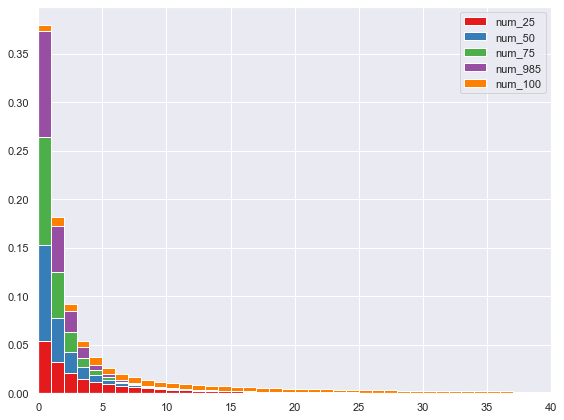

In [38]:
plt.figure(figsize=(8, 6))

n25 = user_logs_df['num_25']
n50 = user_logs_df['num_50']
n75 = user_logs_df['num_75']
n985 = user_logs_df['num_985']
n100 = user_logs_df['num_100']
names = ['num_25', 
         'num_50', 
         'num_75', 
         'num_985', 
         'num_100']
plt.hist([n25, n50, n75, n985, n100], 
         density=True, 
         stacked=True, 
         bins=bin_edges, 
         label=names)
plt.legend()
plt.xlim([0, 40])
plt.tight_layout()

In [39]:
grouped = user_logs_df.groupby(pd.Grouper(key='date', freq='D')).mean()
grouped.head()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
date,,,,,,,
2015-01-01,5.958517,1.727856,1.056713,1.341483,30.949299,29.138677,8366.537511
2015-01-02,6.284356,1.907723,1.071881,1.274851,31.303564,30.037228,8487.968110
2015-01-03,6.495662,1.859842,1.118373,1.261423,31.869481,30.416233,8600.444519
2015-01-04,6.388609,1.710190,1.035064,1.207671,30.200891,28.935103,8600.382435
2015-01-05,5.808012,1.541761,0.963341,1.119048,31.549887,28.828420,8442.078268


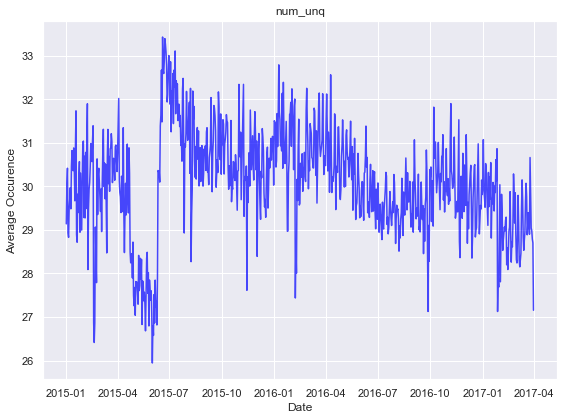

In [40]:
plt.figure(figsize=(8, 6)) 
ax = sns.lineplot(grouped.index, 
                  grouped['num_unq'], 
                  color='blue', 
                  alpha=.7)
plt.xlabel('Date')
plt.ylabel('Average Occurence')
plt.title('num_unq')
plt.tight_layout()

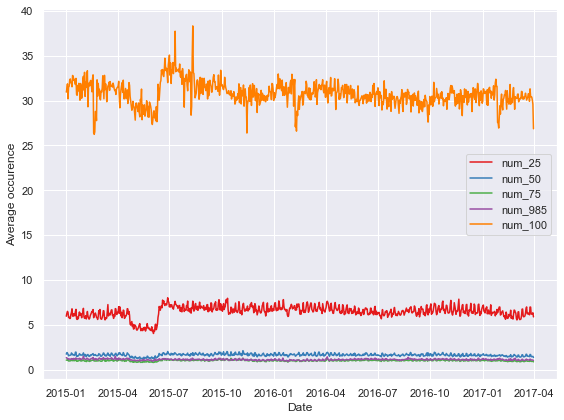

In [41]:
plt.figure(figsize=(8,6)) 
plt.plot(grouped.index, grouped['num_25'], label = 'num_25')
plt.plot(grouped.index, grouped['num_50'], label = 'num_50')
plt.plot(grouped.index, grouped['num_75'], label = 'num_75')
plt.plot(grouped.index, grouped['num_985'], label = 'num_985')
plt.plot(grouped.index, grouped['num_100'], label = 'num_100')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average occurence')
plt.tight_layout()

## Members dataset

In [42]:
members_df = pd.read_pickle('Data/members_clean.pickle')
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,NaN,missing,7,20110914,2011-09-14
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34.0,male,9,20110916,2011-09-16
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63.0,male,9,20110918,2011-09-18
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,NaN,missing,7,20110918,2011-09-18
13,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28.0,female,9,20110920,2011-09-20


In [43]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857038 entries, 1 to 6769469
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   msno                       857038 non-null  object        
 1   city                       857038 non-null  int64         
 2   bd                         359028 non-null  float64       
 3   gender                     857038 non-null  object        
 4   registered_via             857038 non-null  int64         
 5   registration_init_time     857038 non-null  int64         
 6   registration_init_time_dt  857038 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 52.3+ MB


In [44]:
members_df.describe()

,city,bd,registered_via,registration_init_time
count,857038.000000,359028.000000,857038.000000,8.570380e+05
mean,5.487433,29.586275,6.825676,2.013501e+07
std,6.270107,9.135242,1.907170,2.889588e+04
min,1.000000,1.000000,3.000000,2.004033e+07
25%,1.000000,23.000000,7.000000,2.012063e+07
50%,1.000000,28.000000,7.000000,2.014101e+07
75%,11.000000,34.000000,7.000000,2.016020e+07
max,22.000000,99.000000,13.000000,2.017042e+07


In [45]:
members_df.isnull().sum()

msno                              0
city                              0
bd                           498010
gender                            0
registered_via                    0
registration_init_time            0
registration_init_time_dt         0
dtype: int64

In [46]:
members_per_city = members_df.city.value_counts()
members_per_city

1     472151
13     88807
5      68700
4      45819
22     37422
15     36316
6      23469
14     17779
12     11338
9       8583
8       7351
11      7280
18      7026
10      6034
21      5172
3       4921
17      4817
7       2285
16       924
20       699
19       145
Name: city, dtype: int64

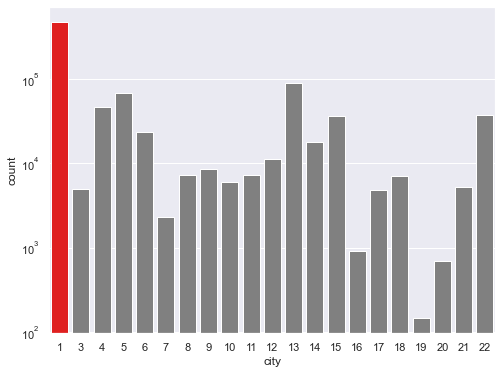

In [47]:
plt.figure(figsize=(8,6))
clrs = ['grey' if (x < max(members_per_city)) else 'red' for x in members_per_city]
city_hist = sns.countplot(x='city', data=members_df, palette=clrs) #, dodge=False)
city_hist.set_yscale("log")

In [48]:
# age

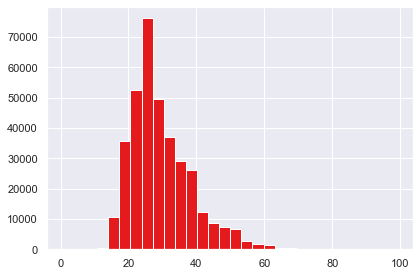

In [49]:
members_df.bd.hist(bins=30)
plt.tight_layout()

In [50]:
# registration method

In [51]:
members_df.registered_via.nunique()

5

In [52]:
members_per_reg_via = members_df.groupby('registered_via')['msno'].count()
members_per_reg_via

registered_via
3     103910
4      58014
7     481482
9     210378
13      3254
Name: msno, dtype: int64

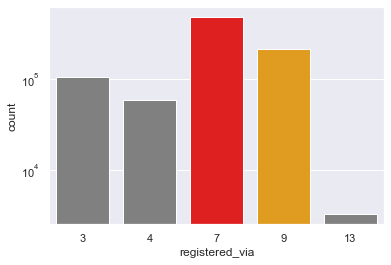

In [53]:
clrs = ['grey' if (x < members_per_reg_via.mean()) else 'orange' if 
        ((x > members_per_reg_via.mean()) & (x < max(members_per_reg_via))) else 
        'red' for x in members_per_reg_via]

plt.figure()
reg_via_hist = sns.countplot(members_df.registered_via, palette=clrs) #, dodge=False)
reg_via_hist.set_yscale("log")

In [54]:
# gender

In [55]:
members_df.gender.unique()

array(['missing', 'male', 'female'], dtype=object)

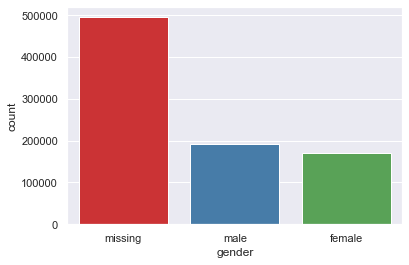

In [56]:
plt.figure()
ax = sns.countplot(members_df.gender)

In [57]:
# Registration initial date

In [58]:
members_df.registration_init_time_dt.dt.to_period('Y').head()

1     2011
7     2011
9     2011
10    2011
13    2011
Name: registration_init_time_dt, dtype: period[A-DEC]

In [59]:
members_df['year'] = members_df.registration_init_time_dt.dt.year
members_df['month'] = members_df.registration_init_time_dt.dt.month
members_df['day'] = members_df.registration_init_time_dt.dt.day
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,year,month,day
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,NaN,missing,7,20110914,2011-09-14,2011,9,14
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34.0,male,9,20110916,2011-09-16,2011,9,16
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63.0,male,9,20110918,2011-09-18,2011,9,18
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,NaN,missing,7,20110918,2011-09-18,2011,9,18
13,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28.0,female,9,20110920,2011-09-20,2011,9,20


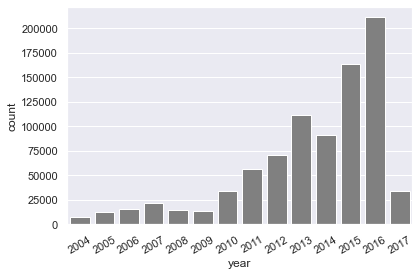

In [60]:
plt.figure()
ax = sns.countplot(data=members_df, x='year', color='Gray')
plt.xticks(rotation=30)
plt.tight_layout()

In [61]:
count_by_month = members_df.groupby(['month'])['registration_init_time'].count()
count_by_month

month
1     91779
2     85543
3     62917
4     47681
5     53942
6     57407
7     73373
8     75918
9     67528
10    79764
11    78726
12    82460
Name: registration_init_time, dtype: int64

In [62]:
month_dict = {1: 'Jan',
             2: 'Feb',
             3: 'Mar',
             4: 'Apr',
             5: 'May',
             6: 'Jun',
             7: 'Jul',
             8: 'Aug',
             9: 'Sep',
             10: 'Oct',
             11: 'Nov',
             12: 'Dec'}
month_dict.values()

dict_values(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

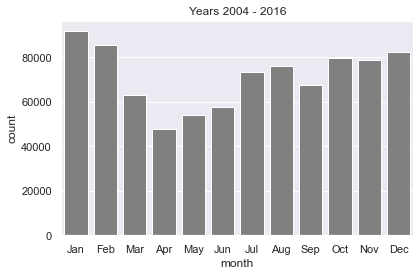

In [63]:
plt.figure()
ax = sns.countplot(members_df['month'], color='Gray') #, dodge=False)
ax.set(xticks=range(len(members_df['month'].unique())), xticklabels=[i for i in month_dict.values()])
ax.set_title('Years 2004 - 2016')
plt.tight_layout()

In [64]:
# make it comulative by years 2016, 2015, 2014, 2013, and below

In [65]:
members_2010_2016_df = members_df[(members_df.year > 2009) & (members_df.year < 2017)]
members_2010_2016_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,year,month,day
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,NaN,missing,7,20110914,2011-09-14,2011,9,14
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34.0,male,9,20110916,2011-09-16,2011,9,16
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63.0,male,9,20110918,2011-09-18,2011,9,18
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,NaN,missing,7,20110918,2011-09-18,2011,9,18
13,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28.0,female,9,20110920,2011-09-20,2011,9,20


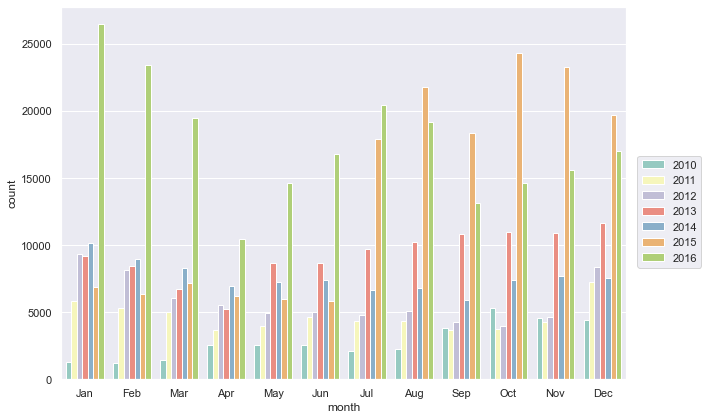

In [66]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = members_2010_2016_df['month'], hue = members_2010_2016_df['year'],  palette='Set3' )
ax.set(xticks=range(len(members_2010_2016_df['month'].unique())), xticklabels=[i for i in month_dict.values()])
ax.legend(loc = [1.02, 0.3])
plt.tight_layout()

In [67]:
# by day

In [68]:
members_2010_2016_df['week_day'] = members_2010_2016_df['registration_init_time_dt'].dt.dayofweek
# Monday=0, Sunday=6
members_2010_2016_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,year,month,day,week_day
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,NaN,missing,7,20110914,2011-09-14,2011,9,14,2
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34.0,male,9,20110916,2011-09-16,2011,9,16,4
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63.0,male,9,20110918,2011-09-18,2011,9,18,6
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,NaN,missing,7,20110918,2011-09-18,2011,9,18,6
13,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28.0,female,9,20110920,2011-09-20,2011,9,20,1


In [69]:
# Monday=0, Sunday=6
day_dict = {0: 'Mon',
           1: 'Tue',
           2: 'Wed',
           3: 'Thu',
           4: 'Fri',
           5: 'Sat',
           6: 'Sun'}

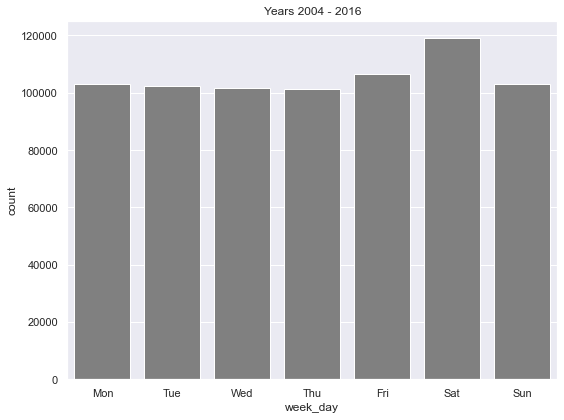

In [70]:
plt.figure(figsize=(8,6))
ax = sns.countplot(members_2010_2016_df['week_day'], color='Gray') #, dodge=False)
ax.set(xticks=range(len(members_2010_2016_df['week_day'].unique())), xticklabels=[i for i in day_dict.values()])
ax.set_title('Years 2004 - 2016')
plt.tight_layout()

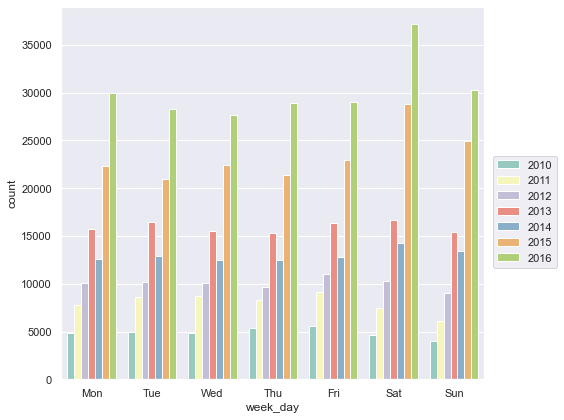

In [71]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = members_2010_2016_df['week_day'], hue = members_2010_2016_df['year'], palette='Set3' ) 
ax.set(xticks=range(len(members_2010_2016_df['week_day'].unique())), xticklabels=[i for i in day_dict.values()])
ax.legend(loc = [1.02, 0.3])
plt.tight_layout()

I will now perform feature engineering. Once the data is tidy, I will get back to EDA to study relationships between variables and target.